# 연습
1. csv 폴더 안에 num_1 폴더에 있는 chipotle.tsv 로드
2. order_id컬럼의 데이터 타입을 str 변경
3. 가장 많이 주문한 item_name을 출력
4. item당 주문 총량의 top10을 바 그래프 표시
5. item_price의 '$'를 제거하고 데이터 타입을 float 형태로 변경
6. 주문당 평균 계산 금액을 출력

In [1]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [31]:
# 파일 로드
df = pd.read_csv("../csv/num_1/chipotle.tsv", sep = '\t')

In [32]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [35]:
# order_id 컬럼 데이터 타입 변경 (str)
df['order_id'] = df['order_id'].astype(str)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [41]:
# 가장 많이 주문한 item_name
df['item_name'].value_counts().index[0]

'Chicken Bowl'

In [51]:
# item 당 주문 총량의 top10
# item_name 기준 그룹화
group_df = df[['quantity', 'item_name']].groupby('item_name').sum()
# 내림차순 정렬
group_df.sort_values('quantity', ascending=False)
# top10
top10 = group_df.head(10)

In [53]:
top10

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [54]:
top10.index

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda'],
      dtype='object', name='item_name')

In [52]:
import seaborn as sns

<BarContainer object of 10 artists>

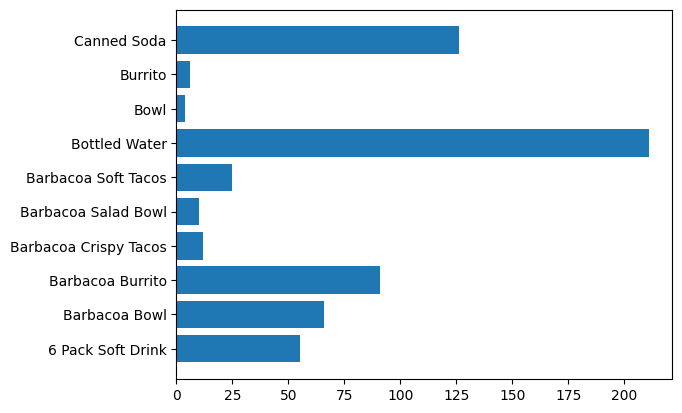

In [56]:
# 바그래프 표시
x = top10.index
y = top10['quantity']
plt.barh(x, y)

In [67]:
# item_price의 '$' 제거
df['item_price'] = df['item_price'].str.replace('$' , '')

C:\Users\shoni\AppData\Local\Temp\ipykernel_10388\2003668889.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = df['item_price'].str.replace('$' , '')


In [69]:
# 데이터타입 변경 (float)
df['item_price'] = df['item_price'].astype(float)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


In [75]:
# 주문당 평균 계산 금액 출력
# order id 기준 그룹화
price_mean = df[['order_id', 'item_price']].groupby('order_id').mean()

In [76]:
price_mean

,item_price
order_id,
1,2.890000
10,6.600000
100,5.040000
1000,10.250000
1001,5.040000
...,...
995,8.316667
996,10.750000
997,22.500000
